# MODELO  NO SUPERVISADO 

In [3]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
warnings.filterwarnings('ignore')
from matplotlib.cm import viridis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
# Se carga el data set
electrica=pd.read_csv(r'..\\datasets\\electrica.csv')  

In [5]:
# Se verifica el tipo de dato de cada columna
electrica. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     511 non-null    int64  
 1   country                                  511 non-null    object 
 2   per_capita_electricity                   511 non-null    float64
 3   electricity_generation                   511 non-null    float64
 4   biofuel_electricity                      511 non-null    float64
 5   coal_electricity                         511 non-null    float64
 6   fossil_electricity                       511 non-null    float64
 7   gas_electricity                          511 non-null    float64
 8   hydro_electricity                        511 non-null    float64
 9   nuclear_electricity                      511 non-null    float64
 10  oil_electricity                          511 non-n

In [6]:
# Se verifica que no hayan valores nulos
electrica.isna().sum()

year                                       0
country                                    0
per_capita_electricity                     0
electricity_generation                     0
biofuel_electricity                        0
coal_electricity                           0
fossil_electricity                         0
gas_electricity                            0
hydro_electricity                          0
nuclear_electricity                        0
oil_electricity                            0
other_renewable_electricity                0
other_renewable_exc_biofuel_electricity    0
renewables_electricity                     0
solar_electricity                          0
wind_electricity                           0
energy_per_gdp                             0
energy_per_capita                          0
gdp                                        0
population                                 0
dtype: int64

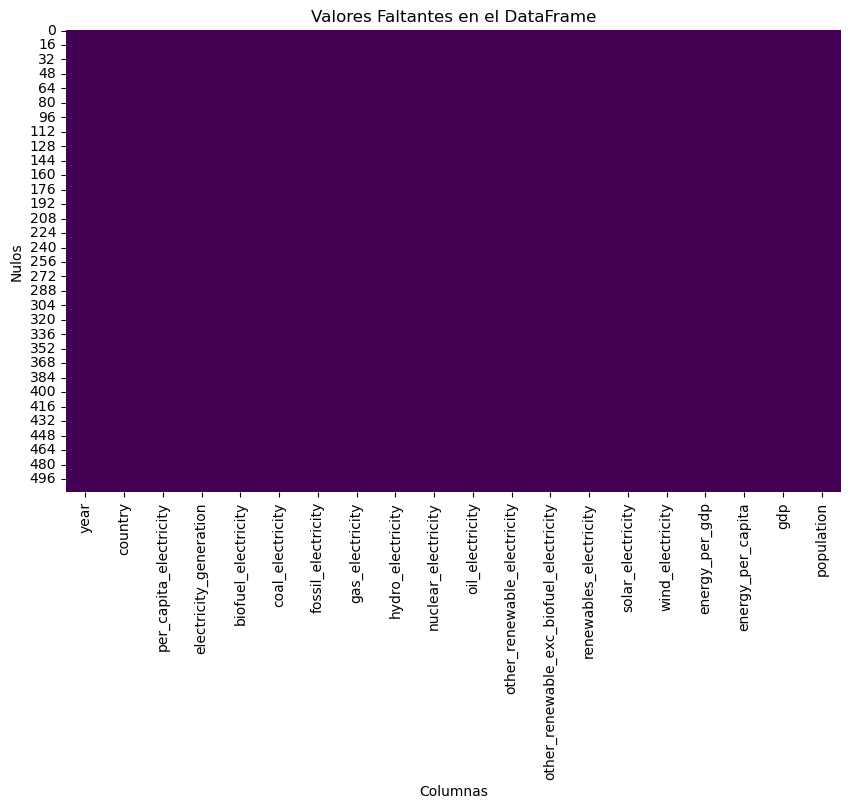

In [7]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(electrica.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

Debido a que los países latinos selecionados no poseen información sobre la producción de electricidad proveniente del carbón se eliminará la columna.

In [8]:
# Se realizan códigos para la columna country que posee variables cualitativas
map_gender = {'Argentina': 1, 'Bolivia':2, 'Brazil':3, 'Chile':4, 'Colombia':5, 'Ecuador':6,'French Guiana':7, 'Guyana':8, 'Paraguay':9, 'Peru':10, 'Suriname':11,'Trinidad and Tobago':12, 'Uruguay':13, 'Venezuela':14}
electrica['country'] =electrica['country'].replace(map_gender)

In [9]:
print(electrica.columns)

Index(['year', 'country', 'per_capita_electricity', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity',
       'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_gdp',
       'energy_per_capita', 'gdp', 'population'],
      dtype='object')


In [10]:
# Se observan los datos numericos, para proceder a normalizarlos
electrica.describe()

,year,country,per_capita_electricity,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,gdp,population
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,5.110000e+02,5.110000e+02
mean,2001.753425,7.471624,2874.361444,85.445912,5.958861,146.996239,172.160532,17.081706,41.144986,12.915965,8.082613,2.342299,0.023650,47.392714,1.033726,2.871656,1.958937,22197.360654,4.594854e+11,2.556669e+07
std,10.548946,4.043232,2425.300516,359.409041,23.361200,807.005258,877.210321,45.640541,98.068798,63.755005,27.830814,9.097475,0.108272,130.671052,11.771834,22.170455,1.836780,28404.635354,7.769754e+11,4.484910e+07
min,1984.000000,1.000000,14.485000,0.044000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524000,2484.454000,2.381686e+09,8.200000e+04
25%,1993.000000,4.000000,1078.954000,4.335000,0.000000,0.000000,0.247500,0.000000,0.800000,0.000000,0.042000,0.000000,0.000000,0.843000,0.000000,0.000000,1.043000,8817.709000,3.586599e+10,1.287000e+06
50%,2002.000000,7.000000,2276.340000,16.929000,0.041000,0.000000,5.281000,1.922000,10.543000,0.000000,0.701000,0.102000,0.000000,11.838000,0.000000,0.000000,1.240000,16044.719000,1.570000e+11,1.070700e+07
75%,2011.000000,11.000000,3685.829500,62.564000,0.886000,2.644500,22.465000,11.641500,33.952000,0.000000,4.977000,0.901000,0.000000,36.049000,0.007000,0.020000,1.759500,23163.111000,3.960000e+11,2.895800e+07
max,2020.000000,14.000000,9950.967000,7623.696000,129.640000,4631.215000,5044.957000,253.425000,1355.200000,366.200000,160.317000,129.740000,0.610000,2212.540000,261.100000,466.500000,10.055000,176106.743000,3.180000e+12,2.110500e+08


In [ ]:
#Calcular el rango intercuartílico (IQR)
Q1 = electrica['per_capita_electricity'].quantile(0.25)
Q3 = electrica['per_capita_electricity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = (electrica['per_capita_electricity'] < lower_bound) | (electrica['per_capita_electricity'] > upper_bound)
x = electrica[~outliers]

In [11]:
maximos_por_columna = electrica.max()
# Mostrar los resultados
print("Valores máximos por columna:")
print(maximos_por_columna)

Valores máximos por columna:
year                                       2.020000e+03
country                                    1.400000e+01
per_capita_electricity                     9.950967e+03
electricity_generation                     7.623696e+03
biofuel_electricity                        1.296400e+02
coal_electricity                           4.631215e+03
fossil_electricity                         5.044957e+03
gas_electricity                            2.534250e+02
hydro_electricity                          1.355200e+03
nuclear_electricity                        3.662000e+02
oil_electricity                            1.603170e+02
other_renewable_electricity                1.297400e+02
other_renewable_exc_biofuel_electricity    6.100000e-01
renewables_electricity                     2.212540e+03
solar_electricity                          2.611000e+02
wind_electricity                           4.665000e+02
energy_per_gdp                             1.005500e+01
energy_per_capita  

In [12]:
#Se escalan los datos
p1_scal = (electrica-electrica.min())/(electrica.max()-electrica.min())
p1_scal

,year,country,per_capita_electricity,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,gdp,population
0,0.000000,0.0,0.353028,0.000039,0.0,0.000000,0.000065,0.000000,0.000000,0.000000,0.002040,0.000000,0.0,0.000007,0.000057,0.000000,0.068723,0.077487,0.125760,0.140566
1,0.027778,0.0,0.149434,0.005937,0.0,0.000131,0.003722,0.049182,0.015235,0.015745,0.035592,0.000794,0.0,0.009378,0.000000,0.000000,0.073340,0.073841,0.118207,0.142837
2,0.055556,0.0,0.159250,0.006424,0.0,0.000219,0.004396,0.052367,0.015503,0.015595,0.049240,0.000825,0.0,0.009544,0.000000,0.000000,0.076592,0.081460,0.127334,0.145126
3,0.083333,0.0,0.166732,0.006830,0.0,0.000219,0.004688,0.049553,0.016116,0.017654,0.062863,0.000832,0.0,0.009920,0.000000,0.000000,0.078271,0.084225,0.131425,0.147425
4,0.111111,0.0,0.165378,0.006881,0.0,0.000342,0.006100,0.081109,0.011093,0.015833,0.053862,0.000933,0.0,0.006849,0.000000,0.000000,0.082048,0.084017,0.129537,0.149724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.861111,1.0,0.397261,0.015627,0.0,0.000000,0.008910,0.177382,0.054715,0.000000,0.000000,0.000000,0.0,0.033549,0.000027,0.000152,0.143846,0.160911,0.151251,0.142202
507,0.888889,1.0,0.351372,0.013722,0.0,0.000000,0.008374,0.166704,0.045992,0.000000,0.000000,0.000000,0.0,0.028206,0.000027,0.000152,0.165040,0.145911,0.123872,0.141107
508,0.916667,1.0,0.342819,0.013188,0.0,0.000000,0.008048,0.160209,0.044202,0.000000,0.000000,0.000000,0.0,0.027109,0.000027,0.000152,0.165040,0.141055,0.123872,0.138978
509,0.944444,1.0,0.335312,0.012674,0.0,0.000000,0.007734,0.153967,0.042479,0.000000,0.000000,0.000000,0.0,0.026054,0.000023,0.000152,0.165040,0.121609,0.123872,0.136537


Se utilizará el método Kmeans, para agrupar a los países de acuerdo al consumo de electricidad per cápita medido en kv/h y el consumo de energía per cápita medido en Kv/h/año.

In [61]:
# Se seleccionan las variables a analizar
x=p1_scal[['per_capita_electricity', 'energy_per_capita']].values
pd.DataFrame(x).head(5)

,0,1
0,0.353028,0.077487
1,0.149434,0.073841
2,0.159250,0.081460
3,0.166732,0.084225
4,0.165378,0.084017


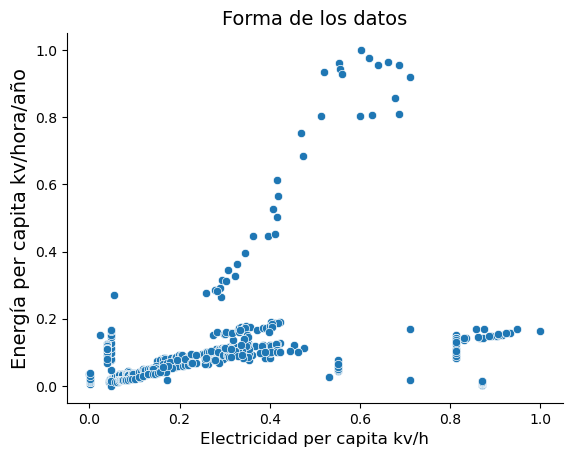

In [94]:
# Se muestra la forma de los datos 
viridis_palette = sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(x=x[:, 0], y=x[:, 1], palette=viridis_palette)
sns.despine()
plt.title('Forma de los datos', size=14)
plt.xlabel('Electricidad per capita kv/h', size=12)
plt.ylabel('Energía per capita kv/hora/año', size=14)
plt.show()

De acuerdo a la forma el método que se utilizará es Kmeans. Se realizará el agrupamiento de las variables: energía per capita y electricidad per capita para establecer conclusiones.

## Método del codo:
Se realiza el método del codo para conocer los posibles clusters en que se clasificará el modelo. Dependiendo delos valores que arroje se realizarán las pruebas pertinentes.



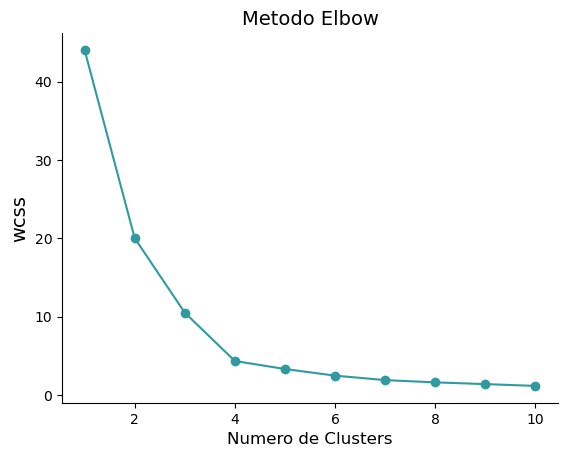

In [93]:
#Se realiza el método del codo para determinar la cantidad de clusters
viridis_palette = sns.color_palette("viridis", as_cmap=True)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker='o',c="#2f9aa0FF")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Se observa que el grafico arroja un numero de clusters que esta entre  2, 3 y 4 que son los puntos en donde se aprecia que comienza a disminuir bruscamente (punto de quiebre) la variación. A continuación se verificarán los distintos clusters para determinar cual tiene mejor desempeño.

## Cantidad de clusters: 4

In [64]:
# Se instancia el modelo con el numero de clusters=4
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(x)
KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=4, random_state=0)

In [65]:
# Se realizan las etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)

array([0, 1, 2, 3])

In [66]:
# Se realiza la predicción:
y_means4=kmeansmodel4.fit_predict(x)

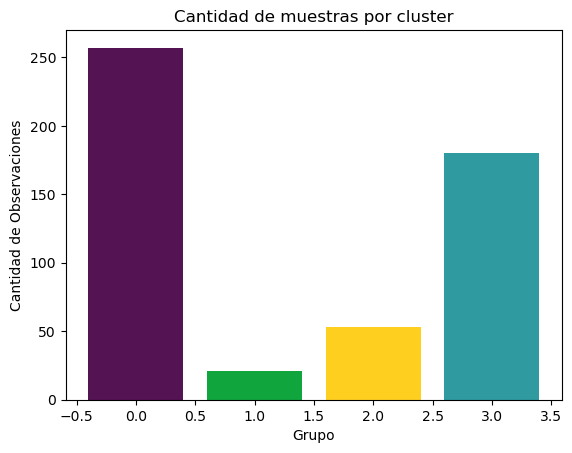

In [96]:
#Se verifica la cantidad de observaciones (4 clusters)
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['#541352FF', '#10a53dFF','#ffcf20FF', '#2f9aa0FF']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 4 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [68]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[0.10402464 0.04930555]
 [0.56267498 0.82214632]
 [0.85490496 0.09630187]
 [0.35118556 0.12765471]]


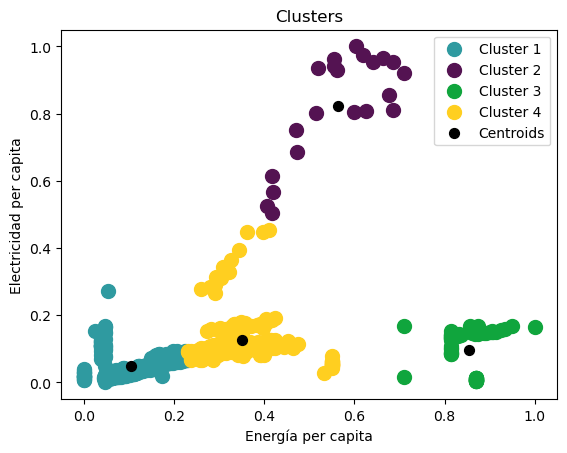

In [92]:
# Se observan los posibles clusters
plt.scatter(x[y_means4 == 0, 0], x[y_means4 == 0, 1], s = 100, c = '#2f9aa0FF', label = 'Cluster 1')
plt.scatter(x[y_means4== 1, 0], x[y_means4 == 1, 1], s = 100, c = '#541352FF', label = 'Cluster 2')
plt.scatter(x[y_means4 == 2, 0], x[y_means4 == 2, 1], s = 100, c ='#10a53dFF', label = 'Cluster 3')
plt.scatter(x[y_means4 == 3, 0], x[y_means4 == 3, 1], s = 100, c = '#ffcf20FF', label = 'Cluster 4')
plt.scatter(kmeansmodel4.cluster_centers_[:, 0], kmeansmodel4.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Energía per capita')
plt.ylabel('Electricidad per capita')
plt.legend()
plt.show()

## Cantidad de clusters: 3

In [70]:
# Se instancia el modelo con el numero de clusters=3
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(x)
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

In [71]:
# Se realizan las etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)

array([0, 1, 2])

In [72]:
# Se realiza la predicción:
y_means3=kmeansmodel3.fit_predict(x)

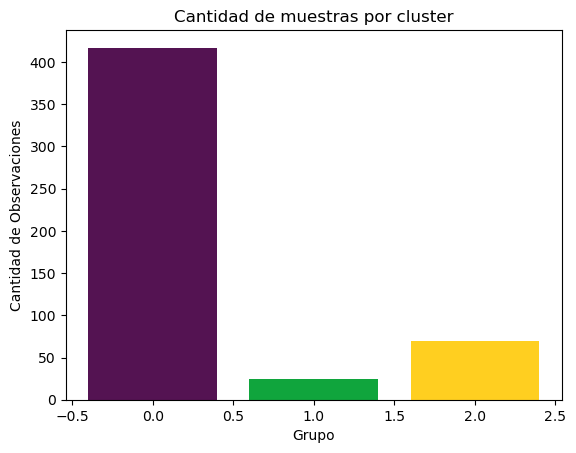

In [97]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['#541352FF', '#10a53dFF','#ffcf20FF']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 3 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [73]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[0.19051136 0.0800244 ]
 [0.54107035 0.77546064]
 [0.78064208 0.0862459 ]]


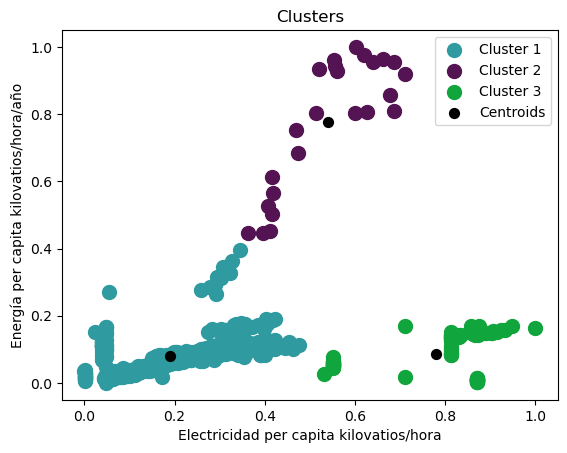

In [90]:
# Se observan los posibles clusters
plt.scatter(x[y_means3 == 0, 0], x[y_means3 == 0, 1], s = 100, c = '#2f9aa0FF', label = 'Cluster 1')
plt.scatter(x[y_means3 == 1, 0], x[y_means3 == 1, 1], s = 100, c = '#541352FF', label = 'Cluster 2')
plt.scatter(x[y_means3 == 2, 0], x[y_means3 == 2, 1], s = 100, c = '#10a53dFF', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Electricidad per capita kilovatios/hora')
plt.ylabel('Energía per capita kilovatios/hora/año')
plt.legend()
plt.show()

## Cantidad de clusters: 2

In [75]:
# Se instancia el modelo con el numero de clusters=2
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(x)
KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=2, random_state=0)

In [54]:
# Se realizan las etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)

array([0, 1])

In [76]:
# Se realiza la predicción:
y_means2=kmeansmodel2.fit_predict(x)

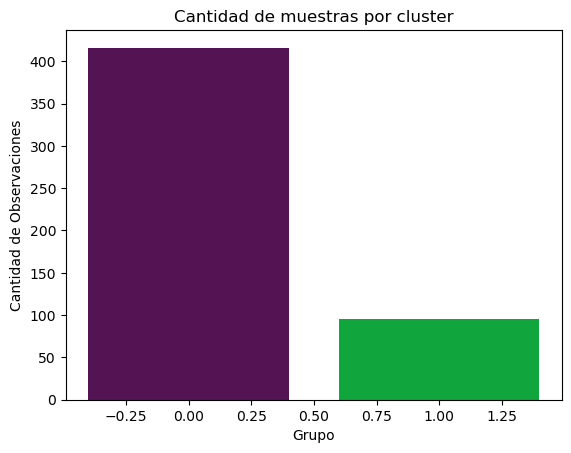

In [98]:
#Se verifica la cantidad de observaciones (2 clusters)
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['#541352FF', '#10a53dFF']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 2 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [78]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[0.18982655 0.07994305]
 [0.71690553 0.26065409]]


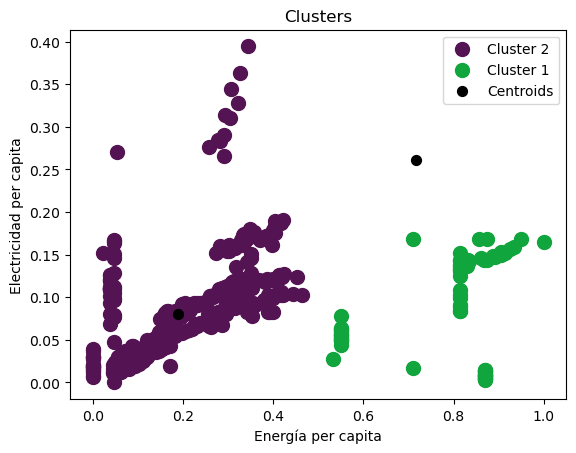

In [89]:
# Se observan los posibles clusters
plt.scatter(x[y_means2 == 0, 0], x[y_means2 == 0, 1], s = 100, c = '#541352FF', label = 'Cluster 2')
plt.scatter(x[y_means3 == 2, 0], x[y_means3 == 2, 1], s = 100, c = '#10a53dFF', label = 'Cluster 1')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Energía per capita')
plt.ylabel('Electricidad per capita')
plt.legend()
plt.show()

### Método Silhoutte

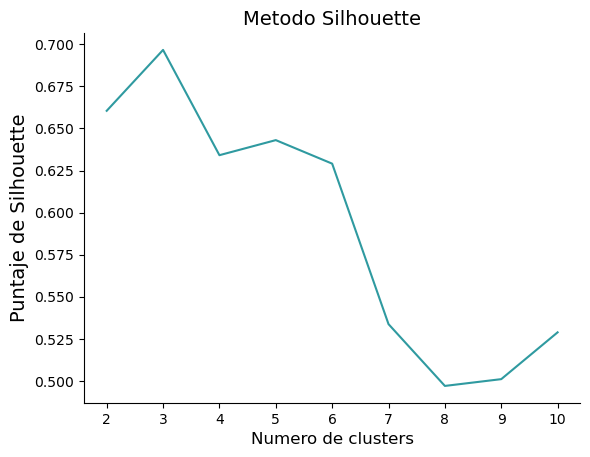

In [88]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))
plt.plot(range(2,11),sil, c="#2f9aa0FF")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

Se puede observar que la cantidad de cluster indicada por el método es 3.  
Se realizará una corrección de los outliers y además se agrgarán datos para equilibrar la cantidad de muestras por clusters para que le método tenga un mejor desempeño.

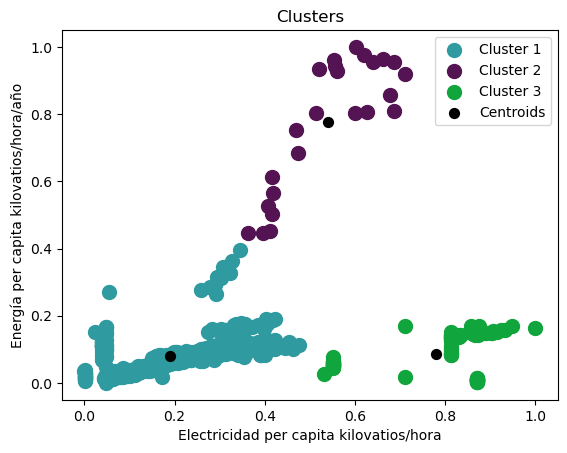

In [87]:
# Se observan los posibles clusters
plt.scatter(x[y_means3 == 0, 0], x[y_means3 == 0, 1], s = 100, c = '#2f9aa0FF', label = 'Cluster 1')
plt.scatter(x[y_means3 == 1, 0], x[y_means3 == 1, 1], s = 100, c = '#541352FF', label = 'Cluster 2')
plt.scatter(x[y_means3 == 2, 0], x[y_means3 == 2, 1], s = 100, c = '#10a53dFF', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Electricidad per capita kilovatios/hora')
plt.ylabel('Energía per capita kilovatios/hora/año')
plt.legend()
plt.show()

Se puede observar que los paises que integran el primer grupo de color celeste poseen el menor consumo de electricidad per capita, pero se puede inferir que es proporcional a la energía per cápita.  Como el consumo de energía per cápita está integrado por la electricidad + calefacción + transporte; en este caso se advierte que los países que integran este cluster no tienen un desarollo tan marcado en el consumo de energía proveniente de la calefacción y transporte. En segundo lugar, el cluster violeta posee un consumo de elctricidad per cápita que va entre los 0.4 y 0.7 kv/h aproximadamente, y a su vez un consumo de energía per cápita superior a los demás grupos, por lo que se puede suponer que se trata de países con mayor desarrollo en transporte y calefacción. Por ultimo, el tercer grupo de color verde, posee un consumo de electricidad per cápita superior a los clusters anteriores, pero el consumo de energía per capita es bajo, por lo que es posible que los países de este grupo no tenga un desarrollo tan marcado en transporte y calefacción. 